In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
import sys
import os

1722510 / 2729287 frames processed

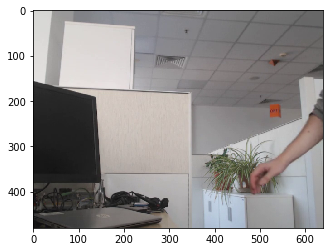

In [2]:
net = cv.dnn.readNet(os.path.join('endless_story', 'MobileNetSSD_deploy.prototxt'),
                     os.path.join('endless_story', 'MobileNetSSD_deploy.caffemodel'))

cap = cv.VideoCapture(os.path.join('endless_story', 'video.mp4'))
totalNumFrames = cap.get(cv.CAP_PROP_FRAME_COUNT)

PERSON_CLASS_ID = 15

i = 0
process = True
while process:
    i += 1
    # Read next frame from the video file
    hasFrame, frame = cap.read()
    if not hasFrame:
        break

    # Prepare input for deep learning network
    blob = cv.dnn.blobFromImage(frame, scalefactor=1.0/127.5, size=(300, 300),
                                mean=(127.5, 127.5, 127.5))   
    net.setInput(blob)
    
    # Do forward pass
    out = net.forward()
    
    # Check output detections
    for detection in out.reshape(-1, 7):
        conf = detection[2]
        classId = detection[1]
        if conf > 0.5 and classId == PERSON_CLASS_ID:
            plt.imshow(cv.cvtColor(frame, cv.COLOR_BGR2RGB))
            process = False
    
    sys.stdout.write('\r%d / %d frames processed' % (i, totalNumFrames))
    sys.stdout.flush()

In [3]:
fps = cap.get(cv.CAP_PROP_FPS)
fps = round(fps)

In [4]:
frame_width = int(cap.get(3))
frame_height = int(cap.get(4))
our_time = 60 
out = cv.VideoWriter('answer.mp4',cv.VideoWriter_fourcc('M','J','P','G'), 30, (frame_width,frame_height))
 
for j in range(i, fps * our_time + i):
    cap.set(cv.CAP_PROP_POS_FRAMES, j)
    _, frame1 = cap.read()
    out.write(frame1)
    
out.release()
cv.destroyAllWindows() 

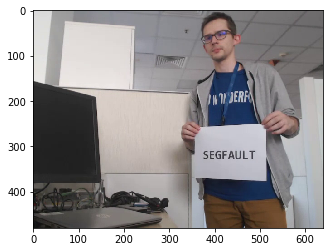

In [5]:
tmp_time = 30
frame_time = fps * tmp_time + i
cap.set(cv.CAP_PROP_POS_FRAMES, frame_time)
tmp, frame_res = cap.read()
plt.imshow(cv.cvtColor(frame_res, cv.COLOR_BGR2RGB))

In [6]:
cv.imwrite('result_frame.png' , frame_res)

True

#### Ответ: SEGFAULT